# MATH 210 Introduction to Mathematical Computing

## March 23, 2018

1. Higher order differential equations
2. Solving first order systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Higher order differential equations

Most numerical methods for solving differential are setup for first order equations and systems. So what do we do to solve a higher order equation? We re-write it as a first order syatem by introducing new variables.

Consider $y'' + y = 0$. This is a second order equation. Let's re-write this as a first order system by introducing variables $u_0 = y$ and $u_1 = y'$. Notice that $u_0' = y' = u_1$ and $u_1' = y'' = -y = -u_0$ since our equation is $y'' = -y$. Then we have

$$
\mathbf{u}'
=
\begin{bmatrix} u'_0 \\ u'_1 \end{bmatrix}
=
\begin{bmatrix} u_1 \\ -u_0 \end{bmatrix}
=
\mathbf{f}(t, \mathbf{u})
$$

Let's try another. Let's transform a second order system into a first order system. Consider

$$
\begin{align*}
x'' & = - \frac{x}{\sqrt{x^2 + y^2}} \\
y'' & = - \frac{y}{\sqrt{x^2 + y^2}} \\
\end{align*}
$$

Introduce new variable $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$.
Then $u_0' = x' = u_1$,

$$
u_1' = x'' = -\frac{x}{\sqrt{x^2 + y^2}} = -\frac{u_0}{\sqrt{u_0^2 + u_2^2}}
$$

and $u_2' = y' =u_3$ and finally

$$
u_3' = y'' = -\frac{y}{\sqrt{x^2 + y^2}} = -\frac{u_2}{\sqrt{u_0^2 + u_2^2}}
$$

In matrix notation

$$
\mathbf{u}'
=
\begin{bmatrix} u'_0 \\ u'_1 \\ u'_2 \\ u'_3 \end{bmatrix}
=
\begin{bmatrix} u_1 \\ -\frac{u_0}{\sqrt{u_0^2 + u_2^2}} \\ u_3 \\ -\frac{u_2}{\sqrt{u_0^2 + u_2^2}} \end{bmatrix}
=
\mathbf{f}(t, \mathbf{u})
$$

## 2. Solving first order systems

In [2]:
from scipy.integrate import odeint

Let's define $\mathbf{f}$ for the first example above $y'' + y = 0$.

In [3]:
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -u[0]
    return dudt

Let's solve the system with initial conditions $y(0)=0$ and $y'(0)=1$.

In [6]:
u0 = [0,1]
t = np.linspace(0,2*np.pi,100)
U = odeint(f,u0,t)

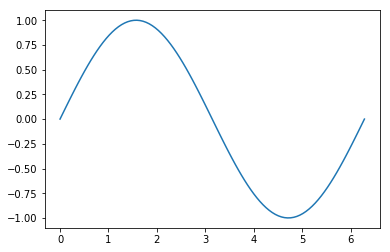

In [8]:
plt.plot(t,U[:,0])
plt.show()

Let's do $y'' + 2y' + 5y = 0$. Introduce variables $u_0 = y$ and $u_1 = y'$ and the system is $u_0' = u_1$ and $u_1' = y'' = -5y-2y' = -5u_0 - 2u_1$.

In [17]:
def f1(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -5*u[0] - 2*u[1]
    print('Hi odeint!')
    print('The derivatives at', u, 'are', dudt)
    return dudt

In [18]:
u0 = [0,1]
t = np.linspace(0,2*np.pi,100)
U = odeint(f1,u0,t)

Hi odeint!
The derivatives at [ 0.  1.] are [ 1. -2.]
Hi odeint!
The derivatives at [  7.73183155e-06   9.99984536e-01] are [ 0.99998454 -2.00000773]
Hi odeint!
The derivatives at [  7.73171199e-06   9.99984536e-01] are [ 0.99998454 -2.00000773]
Hi odeint!
The derivatives at [  1.54634240e-05   9.99969073e-01] are [ 0.99996907 -2.00001546]
Hi odeint!
The derivatives at [  1.54633044e-05   9.99969072e-01] are [ 0.99996907 -2.00001546]
Hi odeint!
The derivatives at [ 0.0022242   0.99553919] are [ 0.99553919 -2.00219935]
Hi odeint!
The derivatives at [ 0.00222419  0.99553922] are [ 0.99553922 -2.0021994 ]
Hi odeint!
The derivatives at [ 0.00442312  0.99110453] are [ 0.99110453 -2.00432464]
Hi odeint!
The derivatives at [ 0.00442311  0.99110459] are [ 0.99110459 -2.00432474]
Hi odeint!
The derivatives at [ 0.00661221  0.98666526] are [ 0.98666526 -2.00639159]
Hi odeint!
The derivatives at [ 0.00661221  0.98666533] are [ 0.98666533 -2.0063917 ]
Hi odeint!
The derivatives at [ 0.01580668  0.

The derivatives at [-0.04823105  0.04470739] are [ 0.04470739  0.15174047]
Hi odeint!
The derivatives at [-0.04634262  0.050318  ] are [ 0.050318    0.13107708]
Hi odeint!
The derivatives at [-0.04634262  0.050318  ] are [ 0.050318    0.13107708]
Hi odeint!
The derivatives at [-0.04424763  0.05511973] are [ 0.05511973  0.1109987 ]
Hi odeint!
The derivatives at [-0.04424763  0.05511973] are [ 0.05511973  0.1109987 ]
Hi odeint!
The derivatives at [-0.04197771  0.05913798] are [ 0.05913798  0.09161259]
Hi odeint!
The derivatives at [-0.04197771  0.05913798] are [ 0.05913798  0.09161259]
Hi odeint!
The derivatives at [-0.03956338  0.06240213] are [ 0.06240213  0.07301263]
Hi odeint!
The derivatives at [-0.03956338  0.06240213] are [ 0.06240213  0.07301262]
Hi odeint!
The derivatives at [-0.03703392  0.06494502] are [ 0.06494502  0.05527955]
Hi odeint!
The derivatives at [-0.03703392  0.06494502] are [ 0.06494502  0.05527955]
Hi odeint!
The derivatives at [-0.03441726  0.06680246] are [ 0.0

The derivatives at [-0.00067299  0.00276299] are [ 0.00276299 -0.00216105]
Hi odeint!
The derivatives at [-0.0004601   0.00256277] are [ 0.00256277 -0.00282504]
Hi odeint!
The derivatives at [-0.00046011  0.00256279] are [ 0.00256279 -0.00282501]
Hi odeint!
The derivatives at [-0.00026513  0.00231687] are [ 0.00231687 -0.0033081 ]
Hi odeint!
The derivatives at [-0.00026514  0.0023169 ] are [ 0.0023169  -0.00330809]
Hi odeint!
The derivatives at [ -9.11350247e-05   2.03922889e-03] are [ 0.00203923 -0.00362278]
Hi odeint!
The derivatives at [ -9.11457845e-05   2.03925623e-03] are [ 0.00203926 -0.00362278]
Hi odeint!
The derivatives at [  5.98640405e-05   1.74268333e-03] are [ 0.00174268 -0.00378469]
Hi odeint!
The derivatives at [  5.98552623e-05   1.74271070e-03] are [ 0.00174271 -0.0037847 ]


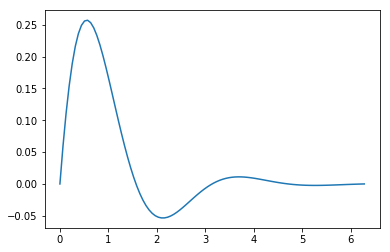

In [19]:
plt.plot(t,U[:,0])
plt.show()

In [13]:
2**2 - 4*1*5

-16